<a href="https://colab.research.google.com/github/hari1991/Edureka-PGDAIML/blob/main/ImageClassification/ClassifyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Classify Signals from Outer Space with Keras__

In [1]:
!wget -q https://raw.githubusercontent.com/hari1991/Edureka-PGDAIML/main/ImageClassification/dataset.zip
!unzip -q dataset.zip

In [2]:
# Installing the Dependencies
!pip install livelossplot

# __1. Importing Libraries__

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)

import warnings;warnings.simplefilter('ignore')

%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.15.0


# __2. Load and Preprocess SETI Data__

In [5]:
train_images = pd.read_csv('dataset/train/images.csv', header=None)
train_labels = pd.read_csv('dataset/train/labels.csv', header=None)

val_images = pd.read_csv('dataset/validation/images.csv', header=None)
val_labels = pd.read_csv('dataset/validation/labels.csv', header=None)

In [8]:
train_images.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
5,0.694118,0.682353,0.705882,0.705882,0.666667,0.694118,0.674510,0.713726,0.690196,0.709804,...,0.658824,0.698039,0.694118,0.709804,0.725490,0.694118,0.729412,0.701961,0.694118,0.709804
6,0.717647,0.686275,0.760784,0.741176,0.709804,0.725490,0.733333,0.698039,0.654902,0.721569,...,0.705882,0.694118,0.737255,0.713726,0.682353,0.705882,0.713726,0.694118,0.721569,0.701961
7,0.713726,0.713726,0.658824,0.690196,0.682353,0.705882,0.709804,0.717647,0.733333,0.733333,...,0.690196,0.690196,0.721569,0.709804,0.729412,0.729412,0.694118,0.733333,0.721569,0.694118
8,0.658824,0.678431,0.729412,0.690196,0.705882,0.678431,0.658824,0.670588,0.713726,0.670588,...,0.721569,0.694118,0.717647,0.701961,0.627451,0.650980,0.686275,0.690196,0.698039,0.721569
9,0.721569,0.729412,0.764706,0.709804,0.701961,0.658824,0.709804,0.709804,0.698039,0.717647,...,0.650980,0.670588,0.745098,0.698039,0.745098,0.745098,0.694118,0.729412,0.756863,0.709804


In [7]:
train_labels.head(10)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [9]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


> __64 x 128 = 8192 Width * height matrix i.e the dimension of the images here__

### __Reshaping the Images for both Training and Validation__

In [10]:
x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values

- `train_images` is a __Pandas Dataframe__ and we want to shape the __numpy__ array, so we need to type the values, so that we can get an N-dim __Numpy Array__ and then we added `.shape()`  to shape it.

- _(training_Examples=3200, width=64, heght=128, Channel information=1)_

- Since of this information is been converted to __2D__ Spectrogram, Hence we don't have any __RGB__ information

# __3. Plot 2D Spectrograms__

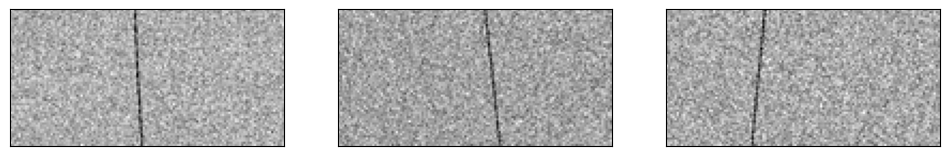

In [11]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

- Creatingg One subPlot with 3 images in them, This is achived by looping the range(1, 4)

- Then Using Matplotlib subplot helper function with 1 rows and 3 column

- Then we create the image for our numpy array

- `np.squeez` is used to remove the extra axis i.e  the cahnnel inforamtion `(800, 64, 128, 1)` hence numpy is used to remove that additional axis

- Then we set the xticks & yticks as a blank list.

- Every output image corrospond to an class i.e squgel, narrow band or Noise.

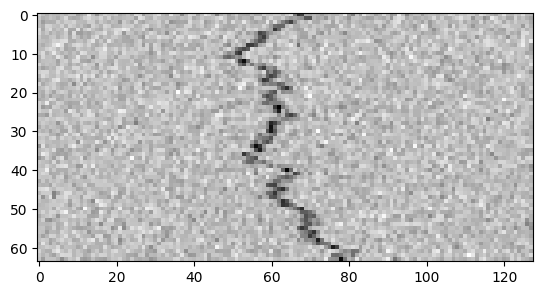

In [12]:
# Setting the color_map argument to gray Scale images
plt.imshow(np.squeeze(x_train[3]), cmap='gray')

# __4. Create Training and Validation Data Generators__

$\color{red}{\textbf{NOTE:}}$ Our __Data__ is already __Normalise__ hence no __Normalization__ is required.

In [13]:
# Performing the Keras Preprocessing
# Only one aspect Data Augmentation is Performed
# i.e ->> Randomly fliping the images along the Horizontal axis
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fitting the DataGenerator so that it can learn the Statistics and properties about the training images
datagen_train = ImageDataGenerator(horizontal_flip = True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip = True)
datagen_val.fit(x_val)

USe the Following command to genrate the documentation `ImageDataGenerator?`

# __5. Creating the CNN Model__

In [14]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

- Filter/Kernal = 5 x 5
- Input Channel = 1 corresponding to the Gray scale Images
- We need 32 different feature Maps i,e 32 different
- Output of CNNs = 64 x 128 x 32

In [15]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32, (5,5), padding = 'same', input_shape = (64, 128, 1))) # '1' for greyscale Image
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


# 2nd Convolution layer
model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))      # Since we are using the larger Number or Neurons
                             # Hence we are setting a higher Dropout Regularization rate

# Adding the last dense Output layer ->> SOFTMAX

model.add(Dense(4, activation = 'softmax')) # '4' as output has 4 classes

# 6. __Learning Rate Scheduling and Compile the Model__

In [16]:
# Scheduling the Learning Rate
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps = 5,
    decay_rate = 0.96,
    staircase = True
)

# SettingUp the optimizer
opt = Adam(learning_rate = lr_schedule)

In [17]:
# Compiling Our Model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (Batch  (None, 64, 128, 32)       128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

# __7. Training the Model__

${\color{red}{\textbf{NOTE:}}}$

__Use__ the Newer API
```
from livelossplot.inputs.tf_keras import PlotLossesCallback
```
insted of
```
from livelossplot.tf_keras import PlotLossesCallback
```
to avoide this getting this error:
[__callbacks in keras gives KeyError: 'metrics'?__](https://stackoverflow.com/questions/62686634/callbacks-in-keras-gives-keyerror-metrics/62696417#62696417)


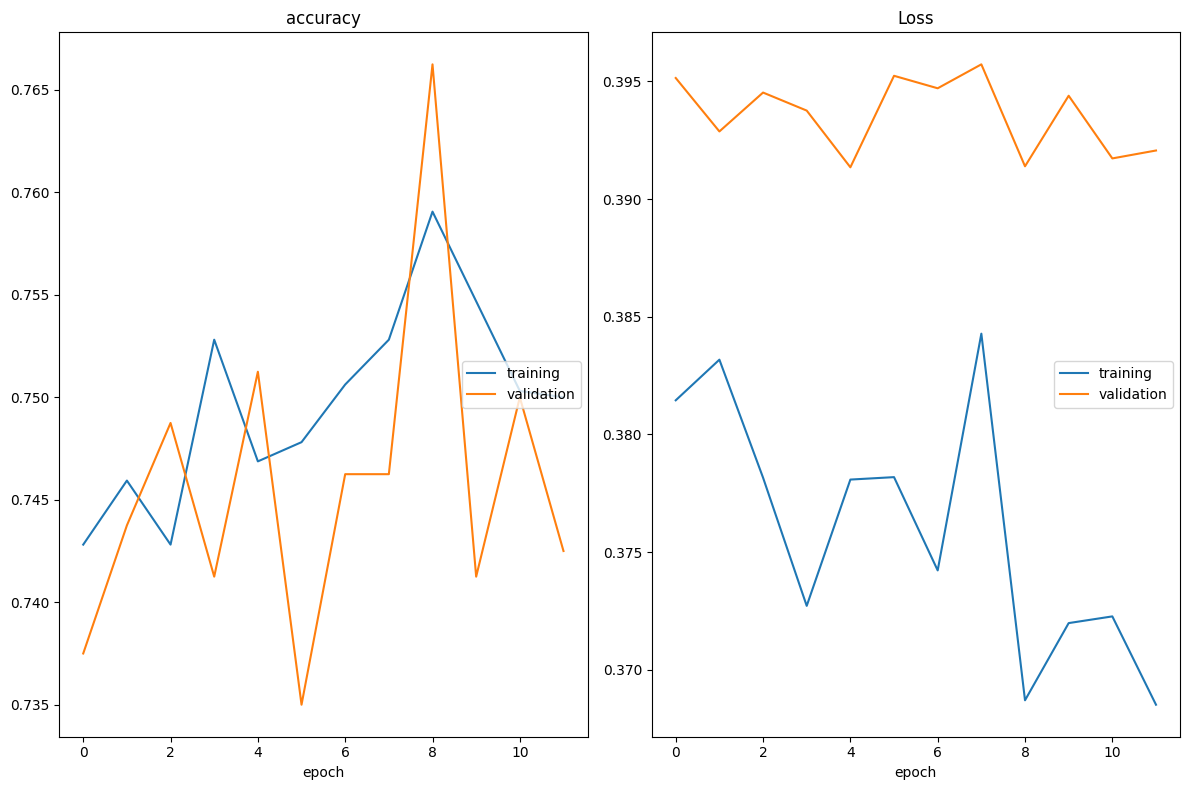

accuracy
	training         	 (min:    0.743, max:    0.759, cur:    0.750)
	validation       	 (min:    0.735, max:    0.766, cur:    0.743)
Loss
	training         	 (min:    0.369, max:    0.384, cur:    0.369)
	validation       	 (min:    0.391, max:    0.396, cur:    0.392)
100/100 [==============================] - 5s 45ms/step - loss: 0.3685 - accuracy: 0.7500 - val_loss: 0.3921 - val_accuracy: 0.7425


In [19]:
from livelossplot.inputs.tf_keras import PlotLossesCallback

# Creating the checkpoints i.e Saving the weights with maximum Validation accuracy
checkpoint = ModelCheckpoint("model_weights.h5",
                             monitor='val_loss',
                             save_weights_only=True,
                             mode='min',
                             verbose=0)

# Callbacks
callbacks = [PlotLossesCallback(), checkpoint]#, reduce_lr]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12,
    callbacks=callbacks
)

# __8. Model Evaluation__

In [20]:
model.evaluate(x_val, y_val)

25/25 [==============================] - 0s 7ms/step - loss: 0.3932 - accuracy: 0.7513


[0.3932488262653351, 0.7512500286102295]

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)

print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       200
           1       0.51      0.72      0.60       200
           2       0.52      0.33      0.40       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.74       800
weighted avg       0.76      0.75      0.74       800

Classification accuracy: 0.751250


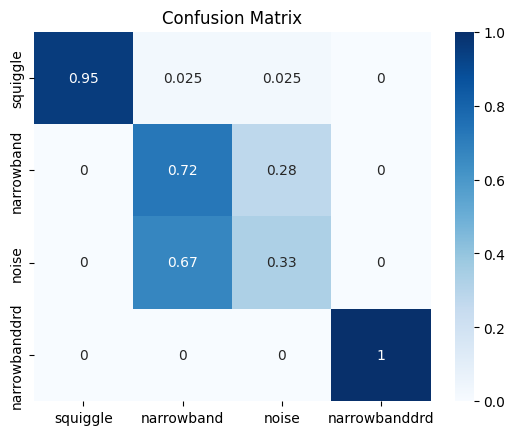

In [22]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); # annot = True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);